<a href="https://colab.research.google.com/github/elsa9421/Interactive-IPython-Demos/blob/main/Soft_Margin_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soft Margin SVM 

 In this notebook the data is non-linearly separable. And an optimal soft margin hyperplane has been implemented with C as the tuning parameter. The support vectors are indicated along with the error lines.

# Non-linearly separable data with outliers




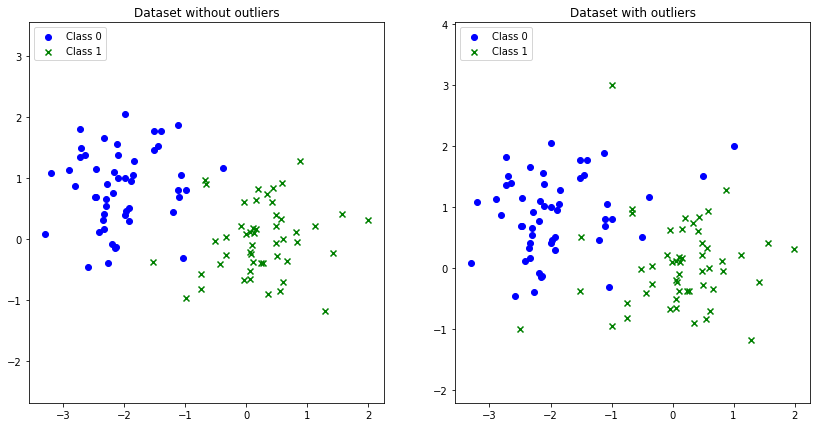

In [ ]:
from sklearn.datasets import make_blobs,make_moons
from sklearn import svm
import numpy as np
from ipywidgets import interact, interactive_output, fixed, interact_manual,interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt




n_samples = 100
X, y = make_blobs(n_samples=n_samples, centers=[(-2, 1), (0.5,0)], random_state=14, cluster_std=0.60)

#Ploting the dataset without outliers
plt.figure(figsize=(14,7))
fig=plt.gcf() 
fig.set_facecolor('white')
plt.subplot(1,2,1)
plt.scatter(X[y==0,0], X[y==0,1], c='b', marker="o", label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], c='g', marker="x", label='Class 1')
plt.legend(loc='upper left')
plt.axis('equal')

plt.title("Dataset without outliers")

#Adding outliers..as required
x_outlier=[(-1.5,0.5),(-0.5,0.5),(0.5,1.5),(1,2),(-2.5,-1),(-1,3)]
# x_outlier=[(-1.85,0.5),(-1.5,1.7),(-1.5,0.5)]
X = np.concatenate([X, x_outlier], axis=0)


# #Labelling the outliers...as required
plt.subplot(1,2,2)
y=  np.concatenate([y,[1,0,0,0,1,1]],axis=0)
plt.scatter(X[y==0,0], X[y==0,1], c='b', marker="o", label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], c='g', marker="x", label='Class 1')
plt.legend(loc='upper left')
plt.axis('equal')
plt.title("Dataset with outliers")
plt.show()


In [ ]:

def plot_portfolio(C=100):
    
    '''
    Function to plot SVM decision boundary, margins, support vectors and error lines

    '''

    plt.figure(figsize=(8,8))
    fig=plt.gcf() 
    fig.set_facecolor('white')
    y_pred = svm.SVC(kernel='linear', C=C).fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    x_vec=np.linspace(x_min,x_max)

    d_boundary=-(y_pred.coef_[0][0]/y_pred.coef_[0][1])* x_vec - y_pred.intercept_/y_pred.coef_[0][1]    #------eq(1)
    plt.plot(x_vec,d_boundary,color='k')
    plt.scatter(y_pred.support_vectors_[:, 0], y_pred.support_vectors_[:, 1], s=120, facecolors='none', edgecolors='k')

    

    w = y_pred.coef_[0]
    m1 = -w[0] / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+m1^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(y_pred.coef_ ** 2))
    yy_down = d_boundary - np.sqrt(1 + m1** 2) * margin     #-----eq(2)
    yy_up = d_boundary + np.sqrt(1 + m1 ** 2) * margin      ##-----eq(3)
    plt.plot(x_vec, yy_down, 'k--') # Class 1 
    plt.plot(x_vec, yy_up, 'k--')  # Class 0 

    #Ploting the dataset with outliers
    plt.scatter(X[y==0,0], X[y==0,1], c='b', marker="o", label='Class 0',s=30)
    plt.scatter(X[y==1,0], X[y==1,1], c='g', marker="x", label='Class 1',s=30)
    plt.legend(loc='upper left')
    plt.axis('equal')
    plt.xlim(x_min,x_max)

    plt.ylim(y_min,y_max)

    ###
    # To plot error stems

    # Indices of support vector
    S_vec=X[y_pred.support_]
    S_vec_class=y[y_pred.support_]

    #Support vectors for class 0
    S_vec0=S_vec[S_vec_class==0]

    
    m2=w[1]/w[0]   # slope of line perpendicular to m1 => i.e m2=-1/m1
    #intercept for class0 - obtained from eq(1) and eq(2)
    c1_class0=np.sqrt(1 + m1 ** 2) * margin- y_pred.intercept_/y_pred.coef_[0][1]  # THis basically evaluates to intercept of the margin
    for i in range(len(S_vec0)):
        c2=S_vec0[i][1]-(m2*S_vec0[i][0])    # intercept of perpendicular line through support vector
        x_end=(c2-c1_class0)/(m1-m2)         # to find value of x on margin such that a perpendicular line can be drawn from support vector pt to margine
                                             # soln of 2 equations -1) eqn of margin and 2) eqn of line perpen to margin, passing through the respective support vec
        x_start=S_vec0[i][0]
        if x_start<=x_end:
          x_vec2=np.linspace(x_start,x_end)
        else:
          x_vec2=np.linspace(x_start,x_end)
        error_line=m2 * x_vec2 +c2 
        plt.plot(x_vec2, error_line, "k-",color='r',linewidth=2)


    #Support vectors for class 0
    S_vec1=S_vec[S_vec_class==1]
    #intercept for class1 obtained from eq (1) and eq(3)
    c1_class1=- np.sqrt(1 + m1** 2) * margin- y_pred.intercept_/y_pred.coef_[0][1]
    for i in range(len(S_vec1)):
        c2=S_vec1[i][1]-(m2*S_vec1[i][0])
        x_end=(c2-c1_class1)/(m1-m2)
        x_start=S_vec1[i][0]
        if x_start<=x_end:
          x_vec2=np.linspace(x_start,x_end)
        else:
          x_vec2=np.linspace(x_start,x_end)
        error_line=m2 * x_vec2 +c2 
        plt.plot(x_vec2, error_line, "k-",color='r',linewidth=2)


    ####



%time interact(plot_portfolio, C=(widgets.FloatLogSlider(value=.19,base=10,min=-2,max=5,step=0.01,description='C',continuous_update=False)))

interactive(children=(FloatLogSlider(value=0.19, continuous_update=False, description='C', max=5.0, min=-2.0, …

CPU times: user 317 ms, sys: 5.43 ms, total: 323 ms
Wall time: 347 ms


<function __main__.plot_portfolio>